In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import time

from numpy.lib.stride_tricks import as_strided
from scipy.ndimage import convolve

In [3]:
%load_ext autoreload
%autoreload 1
%aimport getBayer

In [4]:
rgb = getBayer.get_rgb_array("pic2.jpeg")

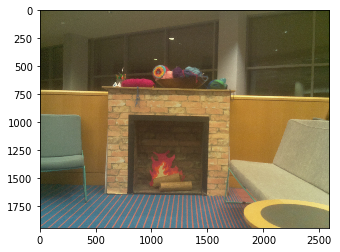

In [5]:
plt.imshow(rgb)

In [39]:
bw = getBayer.get_bw_array("pic2.jpeg", height=64)
# bw = getBayer.get_bw_array("Vd-Orig.png")

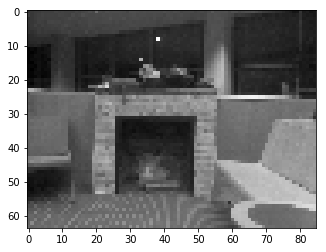

In [40]:
plt.imshow(bw, cmap='gray')

In [38]:
bw = bw * (255/np.max(bw))

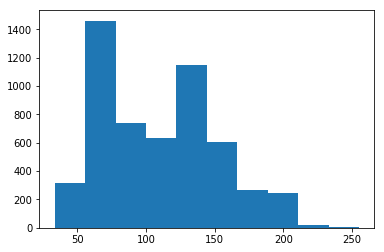

In [23]:
from functools import reduce
import operator
fig = plt.figure()
plt.hist(bw.reshape(reduce(operator.mul, bw.shape, 1)))
fig.patch.set_facecolor('white')

In [24]:
bw.astype(np.int16)

array([[ 79,  82,  85, ...,  60,  53,  55],
       [ 86,  82,  87, ...,  56,  59,  55],
       [ 76,  81,  87, ...,  62,  60,  59],
       ...,
       [116, 122, 143, ..., 139, 139, 144],
       [119, 152, 122, ..., 135, 138, 136],
       [125, 121, 125, ..., 135, 136, 131]], dtype=int16)

In [25]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
ed1 = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32)
ed2 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpbw = convolve(bw.astype(np.float32), ed1, mode='constant', cval=0.0)

sharpbw[sharpbw < 0] = 0
sharpbw[sharpbw > 255] = 255

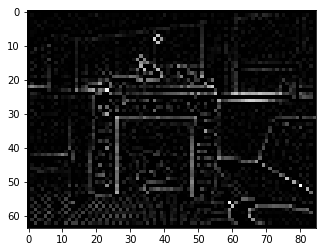

In [26]:
plt.imshow(sharpbw.astype(np.int32), cmap='gray')

In [27]:
np.max(sharpbw)

226.54347

In [28]:
np.min(sharpbw)

0.0

In [29]:
sharpbw

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  9.608688 ,  0.       , ..., 15.8913   ,  0.       ,
         0.       ],
       [ 0.       ,  1.1087036,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       , 43.97825  ,  0.       , ...,  0.       ,  2.586975 ,
         0.       ],
       [ 0.       ,  0.       , 56.173904 , ...,  7.021759 ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [34]:
d = getBayer.getBayer('pic2.jpeg')

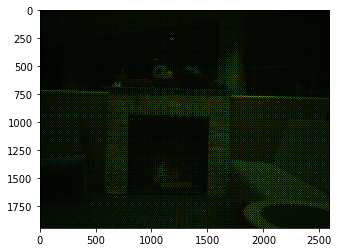

In [35]:
plt.imshow(d)